In [16]:
# 기본 import 패키지
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline

## 2.1 분류와 회귀
지도 학습에는 분류*classification*와 회귀*regression*가 있다.  
 * **분류**: 미리 정의된, 가능성 있는 여러 클래스 레이블 중 하나를 예측하는 것. 두 개의 클래스로 분류하는 이진 분류*binary classification*와 셋 이상의 클래스로 분류하는 다중 분류*multiclass classification*로 나뉜다.
  * NOTE: 이진 분류에서 한 클래스를 **양성** *positive*, 다른 클래스를 **음성** *negative*이라고도 한다. 이는 장점을 나타내는 것이 아니라 학습하고자 하는 대상을 의미한다. 어떤 것을 양성이라고 할지는 주관적인 문제이다.
 * **회귀**: 연속적인 숫자(실수)를 예측하는 것. 출력 값에 연속성이 있다.

## 2.2 일반화, 과대적합, 과소적합
모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있게 된 것을 훈련 세트에서 테스트 세트로 **일반화** *generalization*되었다고 한다. 복잡한 모델에서는 훈련 세트에만 정확한 모델이 될 수 있다.

가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것을 **과대적합** *overfitting*이라고 한다. 모델이 훈련 세트에 너무 가깝게 맞춰져 새로운 데이터에 일반화되기 어려울 때 일어난다. 반대로 모델이 너무 간단하면 데이터의 다양성을 잡아내지 못하며 훈련 세트에도 잘 맞지 않는다. 너무 간단한 모델이 선택되는 것을 **과소적합** *underfitting*이라고 한다.

좋은 모델은 일반화 성능이 최대가 되는 최적점에 있는 모델이다.

### 모델 복잡도와 데이터셋 크기의 관계
데이터셋에 다양한 데이터 포인트가 많으면 과대적합 없이 더 복잡한 모델을 만들 수 있다. 큰 데이터셋은 더 복잡한 모델을 만드는데 도움을 주지만 중복된 데이터나 매우 비슷한 데이터를 모으는 것은 도움이 되지 않는다.

## 2.3 지도 학습 알고리즘
유명한 알고리즘들을 설명한다. 상세한 내용은 http://scikit-learn.org/stable/documentation 참고

### 예제에 사용할 데이터셋
forge 데이터셋: 인위적으로 만든 이진 분류 데이터셋. 데이터 포인트 26개와 특성 2개를 가진다.

X.shape: (26, 2)


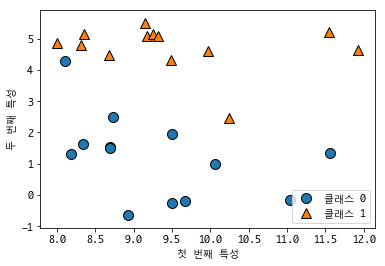

In [7]:
# 데이터셋을 만든다.
X, y = mglearn.datasets.make_forge()
# 산점도를 그린다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape: {}".format(X.shape))

wave 데이터셋: 회귀 알고리즘 설명에 사용한다.입력 특성 하나와 모델링할 타깃 변수를 가진다.

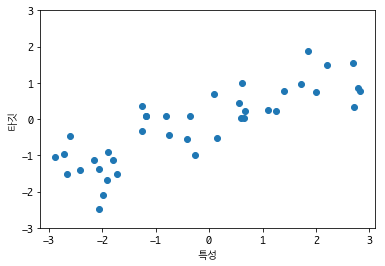

In [6]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

cancer 데이터셋 : 위스콘신 유방암 데이터셋. 유방암 종양의 임상 데이터가 기록된 실제 데이터셋.  
569개의 데이터와 30개의 특성을 가진다. 그중 212개는 악성이고 357개는 양성이다.

In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n{}".format(cancer.keys()))
print("데이터의 형태: {}".format(cancer.data.shape))
print("클래스별 샘플 개수:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("특성 이름:\n{}".format(cancer.feature_names))

cancer.keys():
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
데이터의 형태: (569, 30)
클래스별 샘플 개수:
{'malignant': 212, 'benign': 357}
특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


boston 데이터셋 : 회귀분석용 보스턴 주택가격 데이터셋. 범죄율, 강 인접도, 고속도로 접근성 등의 정보를 이용해 1970년대 보스턴 주변 주택의 평균 가격을 예측한다. 데이터 506개와 특성 13개가 있다.

13개의 특성뿐 아니라 특성끼리 곱하여(상호작용) 의도적으로 확장할 수 있다. 이처럼 특성을 유도해내는 것을 **특성 공학** *feature engineering*이라고 한다. `load_extended_boston` 함수를 이용해 불러들인 결과엔 기존 특성을 2개씩 짝지은 91개의 특성이 추가돼 총 104개의 특성이 있다.

In [17]:
from sklearn.datasets import load_boston
boston = load_boston()
print("shape: {}".format(boston.data.shape))

shape: (506, 13)


In [18]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


### k-최근접 이웃
k-NN 알고리즘: 가장 간단한 머신러닝 알고리즘. 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 것의 전부이다. 예측할 땐 훈련 데이터셋에서 가장 가까운 데이터를 찾는다.

#### k-최근접 이웃 분류
forge 데이터셋을 분류했다.

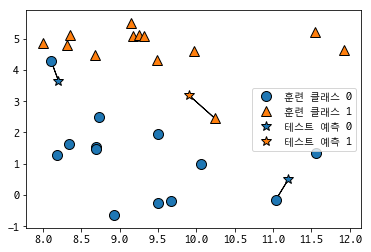

In [19]:
mglearn.plots.plot_knn_classification(n_neighbors=1)